Keras provides two APIs when building models: 
- Sequential API via `keras.models.Sequential`
- Functional API via `kears.Model`

In [1]:
import tensorflow as tf 
from tensorflow import keras

2022-10-10 20:00:18.532415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.10.0'

In [3]:
keras.__version__

'2.10.0'

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [12]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [26]:
X_valid, X_train = (
    X_train_full[:5000] / 255.0,
    X_train_full[5000:] / 255.0
)
y_valid, y_train = (
    y_train_full[:5000],
    y_train_full[5000:]
)

In [27]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [28]:
class_names[y_train[0]]

'Coat'

In [29]:
# Creating the model using sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-10-10 22:46:02.965881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers

In [33]:
hidden1 = model.layers[1]

In [34]:
hidden1.name

'dense'

In [35]:
model.get_layer("dense") is hidden1

True

In [36]:
weights, biases = hidden1.get_weights()

In [38]:
weights.shape

(784, 300)

In [39]:
biases.shape

(300,)

In [40]:
# compile the model 
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)

In [49]:
# train
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7121 - accuracy: 0.7671 - val_loss: 0.5086 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4857 - accuracy: 0.8310 - val_loss: 0.4436 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4411 - accuracy: 0.8463 - val_loss: 0.4111 - val_accuracy: 0.8614
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4154 - accuracy: 0.8552 - val_loss: 0.4326 - val_accuracy: 0.8536
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3959 - accuracy: 0.8604 - val_loss: 0.3856 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8664 - val_loss: 0.3685 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3684 - accuracy: 0.8705 - val_loss: 0.3736 - val_accuracy:

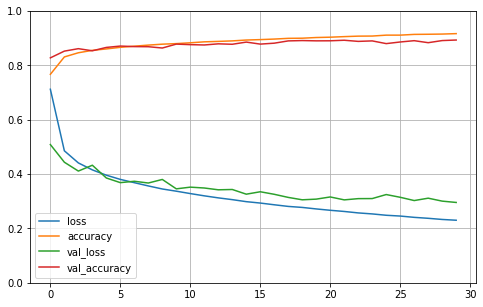

In [56]:
import pandas as pd
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
# evaluate
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.1265 - accuracy: 0.8488


[59.126495361328125, 0.848800003528595]

In [62]:
# make predictions 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 30ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [65]:
# y_pred = model.predict_classes(X_new) deprecated!!!!
y_pred = np.argmax(y_proba, axis=1)

In [66]:
y_pred

array([9, 2, 1])

## Building a Regression MLP Using the Sequential API

In [67]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [68]:
housing = fetch_california_housing()

In [85]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [87]:
model = keras.models.Sequential()
model.add(
    keras.layers.Dense(
        30, 
        activation="relu",
        input_shape=X_train.shape[1:]
    )
)
model.add(keras.layers.Dense(1))

In [88]:
model.compile(
    loss="mean_squared_error", 
    optimizer="sgd"
)

In [89]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    validation_data=(X_valid, y_valid)
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8703 - val_loss: 0.5603
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5190 - val_loss: 0.4524
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4600 - val_loss: 0.4411
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4509 - val_loss: 0.4345
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.4300
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4304 - val_loss: 0.4434
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4209 - val_loss: 0.4629
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.5190
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4121 - val_loss: 0.5429
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4043 - val_loss: 0.6064

In [90]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 1.5598


In [91]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 50ms/step


In [92]:
y_pred

array([[1.5753989],
       [3.177548 ],
       [2.409305 ]], dtype=float32)

In [93]:
y_test[:3]

array([2.875, 2.4  , 2.494])